In [795]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

In [796]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 9999;   //设置输出>9999时才出现滑动窗口
IPython.OutputArea.prototype._should_scroll = function(){return false}  // 设置不出现滑动窗口 true, auto, false 


<IPython.core.display.Javascript object>

### 数据读取

In [797]:
explain_path='./数据说明.txt'
train_path='./train_set.csv'
test_path='./test_set.csv'
explain=pd.read_table(explain_path,sep='\t',index_col='NO')
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)


### 数据展示

In [798]:
#各个字段的含义
explain

,字段名称,数据类型,字段描述
NO,,,
1,ID,Int,客户唯一标识
2,age,Int,客户年龄
3,job,String,客户的职业
4,marital,String,婚姻状况
5,education,String,受教育水平
6,default,String,是否有违约记录
7,balance,Int,每年账户的平均余额
8,housing,String,是否有住房贷款
9,loan,String,是否有个人贷款


In [799]:
#训练集数据有关信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         25317 non-null  int64 
 1   age        25317 non-null  int64 
 2   job        25317 non-null  object
 3   marital    25317 non-null  object
 4   education  25317 non-null  object
 5   default    25317 non-null  object
 6   balance    25317 non-null  int64 
 7   housing    25317 non-null  object
 8   loan       25317 non-null  object
 9   contact    25317 non-null  object
 10  day        25317 non-null  int64 
 11  month      25317 non-null  object
 12  duration   25317 non-null  int64 
 13  campaign   25317 non-null  int64 
 14  pdays      25317 non-null  int64 
 15  previous   25317 non-null  int64 
 16  poutcome   25317 non-null  object
 17  y          25317 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [800]:
#测试集数据有关信息
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10852 non-null  int64 
 1   age        10852 non-null  int64 
 2   job        10852 non-null  object
 3   marital    10852 non-null  object
 4   education  10852 non-null  object
 5   default    10852 non-null  object
 6   balance    10852 non-null  int64 
 7   housing    10852 non-null  object
 8   loan       10852 non-null  object
 9   contact    10852 non-null  object
 10  day        10852 non-null  int64 
 11  month      10852 non-null  object
 12  duration   10852 non-null  int64 
 13  campaign   10852 non-null  int64 
 14  pdays      10852 non-null  int64 
 15  previous   10852 non-null  int64 
 16  poutcome   10852 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


通过对训练集与测试集有关信息的查看可以得到如下信息
1. 数据一共有17个特征，需要预测的是y（客户是否购买）
2. 训练集有25317个样本，不存在空值
3. 测试集有10852个样本，不存在空值

In [801]:
#训练集数据
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,25313,55,blue-collar,divorced,primary,no,8180,no,no,cellular,14,may,854,2,360,1,failure,1
25313,25314,52,services,married,secondary,no,961,no,yes,cellular,18,feb,222,1,553,4,failure,1
25314,25315,35,blue-collar,divorced,primary,no,300,yes,no,unknown,13,may,945,2,-1,0,unknown,1
25315,25316,37,entrepreneur,divorced,tertiary,no,66,no,no,cellular,18,nov,1164,2,-1,0,unknown,1


In [802]:
#测试集数据
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,36165,29,management,single,tertiary,no,54,yes,yes,unknown,26,may,257,3,-1,0,unknown
10848,36166,35,management,married,secondary,no,674,no,no,cellular,8,aug,87,2,-1,0,unknown
10849,36167,38,services,married,secondary,no,435,yes,no,unknown,23,may,193,2,-1,0,unknown
10850,36168,41,admin.,divorced,secondary,no,783,yes,yes,cellular,14,may,135,3,363,2,failure


通过观察两个数据表的数据，发现有很多为unknown的值，这部分数据是未知的，对于我们分析会造成影响，所以我们后续先看下都有哪些列包含unknown，之后再做进一步处理

### 数据清洗

In [803]:
#为了方便做处理，我把训练集、数据集合在一起处理,而且通过查看训练集和测试集发现根据ID可以把两个数据集很容易的分开
con=pd.concat([train,test]).set_index('ID')
con

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
ID,,,,,,,,,,,,,,,,,
1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0.0
2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0.0
3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0.0
4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0.0
5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36165,29,management,single,tertiary,no,54,yes,yes,unknown,26,may,257,3,-1,0,unknown,NaN
36166,35,management,married,secondary,no,674,no,no,cellular,8,aug,87,2,-1,0,unknown,NaN
36167,38,services,married,secondary,no,435,yes,no,unknown,23,may,193,2,-1,0,unknown,NaN


In [804]:
#查看每一列有多少unknown
con.replace('unknown',np.nan,inplace=True)
num = con.isna().sum()
num


age              0
job            223
marital          0
education     1513
default          0
balance          0
housing          0
loan             0
contact      10393
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     29554
y            10852
dtype: int64

从图中我们可以发现job（客户的职业）,education（受教育水平）,concat（与客户联系的沟通方式）,poutcome（上一次活动的结果）都包含unknown值
1. 对于poutcome缺失数量实在太多，后续我准备直接删除这一列
2. job缺失较少且数据集数据量比较大，所以我选择删除包含缺失值的一行
3. concat和education我选择用众数填充


In [805]:
con['contact'].mode()

0    cellular
dtype: object

In [806]:
con['education'].mode()

0    secondary
dtype: object

In [807]:
con.drop('poutcome',axis=1,inplace=True)
con.dropna(subset=['job'],inplace=True)
con.fillna({'contact':'cellular'},inplace=True)
con.fillna({'education':'secondary'},inplace=True)

In [808]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35946 entries, 1 to 36169
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        35946 non-null  int64  
 1   job        35946 non-null  object 
 2   marital    35946 non-null  object 
 3   education  35946 non-null  object 
 4   default    35946 non-null  object 
 5   balance    35946 non-null  int64  
 6   housing    35946 non-null  object 
 7   loan       35946 non-null  object 
 8   contact    35946 non-null  object 
 9   day        35946 non-null  int64  
 10  month      35946 non-null  object 
 11  duration   35946 non-null  int64  
 12  campaign   35946 non-null  int64  
 13  pdays      35946 non-null  int64  
 14  previous   35946 non-null  int64  
 15  y          25154 non-null  float64
dtypes: float64(1), int64(7), object(8)
memory usage: 4.7+ MB


数据处理之后只有测试集的y有缺失

### 数据可视化

In [809]:
#训练集处理后的数据剩下25154条
train=con[con.index<=25317]
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
ID,,,,,,,,,,,,,,,,
1,43,management,married,tertiary,no,291,yes,no,cellular,9,may,150,2,-1,0,0.0
2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,0.0
3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,0.0
4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,0.0
5,42,technician,divorced,secondary,no,2974,yes,no,cellular,21,may,187,5,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25313,55,blue-collar,divorced,primary,no,8180,no,no,cellular,14,may,854,2,360,1,1.0
25314,52,services,married,secondary,no,961,no,yes,cellular,18,feb,222,1,553,4,1.0
25315,35,blue-collar,divorced,primary,no,300,yes,no,cellular,13,may,945,2,-1,0,1.0


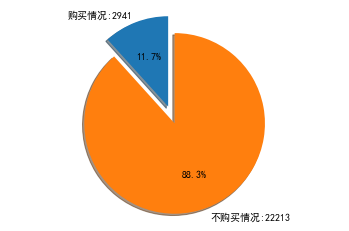

In [810]:
#我们先看下样本是不是倾斜样本，通过饼图来看下购买和不购买理财产品的比例
c_purchase=train[train.loc[:,'y']==1].copy()
c_n_purchase=train[train.loc[:,'y']==0].copy()
pie_data = {'购买情况': c_purchase.shape[0],
            '不购买情况': train.shape[0]-c_purchase.shape[0]}
explode = (0.2, 0)  #  突出购买率

fig1, ax = plt.subplots()
sizes=pie_data.values()
labels =['{}:{}'.format(key,value) for key,value in pie_data.items()]
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # 确保圆形

plt.show()

可以看出，定期理财产品的购买率不高，同时训练样本极其不均衡。后边可以使用过采样解决样本不均衡问题。

最小的年龄：18
最大的年龄：95


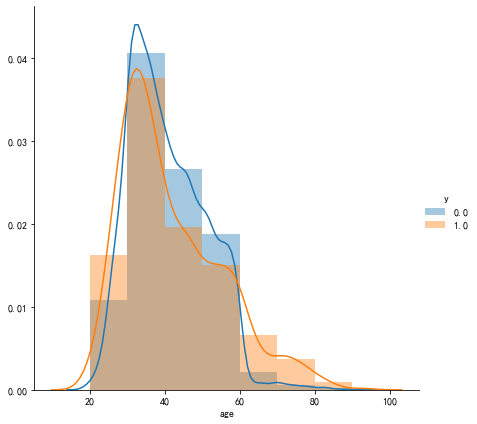

In [811]:
fg = sns.FacetGrid(data=train,height=6,hue='y')
fg = (fg.map(sns.distplot,'age',bins=[20,30,40,50,60,70,80,90])
      .add_legend())
print("最小的年龄：{}".format(train['age'].min()))
print("最大的年龄：{}".format(train['age'].max()))

通过年龄分布直方图发现：

1. 数据样本集中在年龄低的分段
2. 年龄超过60岁和年龄低30岁的人更喜欢定期理财

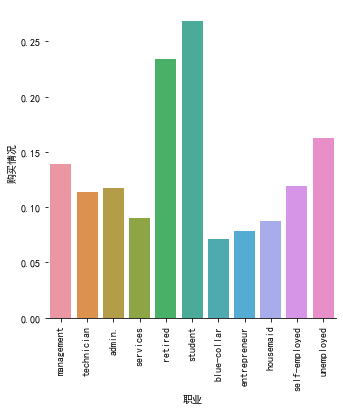

In [812]:
#职业
fg=sns.catplot(data=train,x='job',kind='bar',y='y',ci=None)
fg=(fg.set_xticklabels(rotation=90)
    .set_axis_labels('职业','购买情况')
    .despine(left=True))

通过职业分类查看观察到：

1. 退休人员和学生最青睐定期理财，其次是失业人员
2. 蓝领定期理财的比率最低

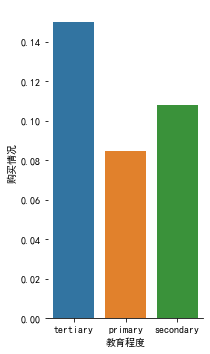

In [813]:
#教育程度
fg=sns.catplot(data=train,x='education',kind='bar',y='y',ci=None,aspect=.6)
fg=(fg.set_axis_labels('教育程度','购买情况')
    .despine(left=True))

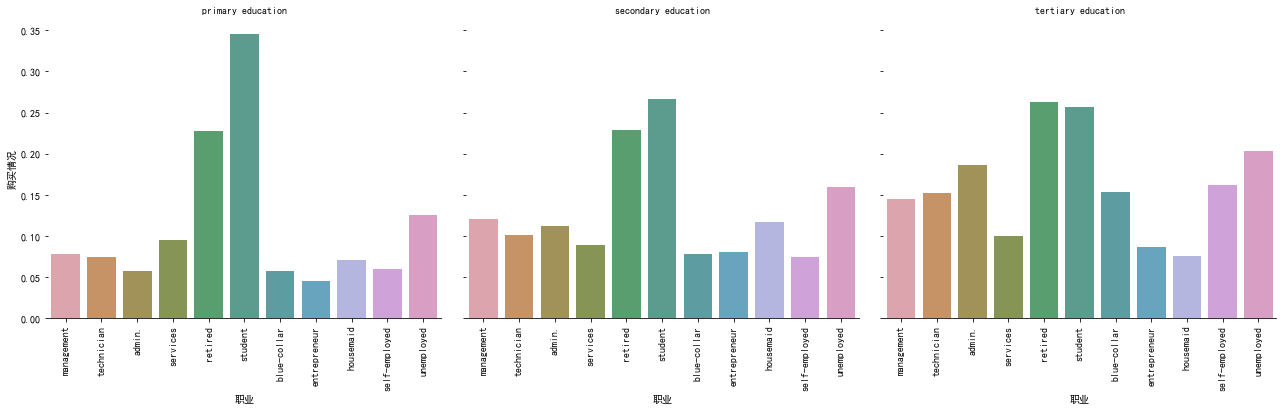

In [814]:
#不同教育程度，不同职业的购买情况
g = sns.catplot(x='job', y='y', col='education',
                data=train, saturation=.5,
                kind='bar', col_order=['primary','secondary','tertiary'],
                aspect=1.2,ci=None)
g = (g.set_axis_labels('职业', '购买情况')
     .set_xticklabels(rotation=90)
     .set_titles('{col_name} {col_var}')
     .despine(left=True))


从上图我们观察到：

1. 无论接受教育的程度如何，进行定期理财的人主要是退休人员和学生，其次是失业人员。
2. 随着教育程度的提高，管理人员、技术人员、行政人员、蓝领、企业家、自由职业者、事业人员越来越倾向接受定期理财。

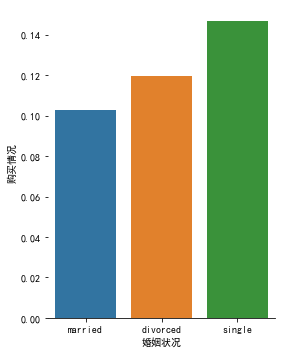

In [815]:
#婚姻状况
fg=sns.catplot(data=train,x='marital',kind='bar',y='y',ci=None,aspect=.8)
fg=(fg.set_axis_labels('婚姻状况','购买情况')
    .despine(left=True))

按照婚姻情况分类观察到：

单身相比离异和已婚倾向于定期理财。

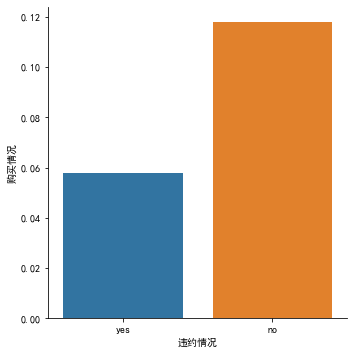

In [816]:
#违约与定期理财
fg=sns.catplot(data=train,x='default',kind='bar',y='y',ci=None,order=['yes','no'])
fg.set_axis_labels("违约情况",'购买情况')

没有违约的人倾向于定期理财

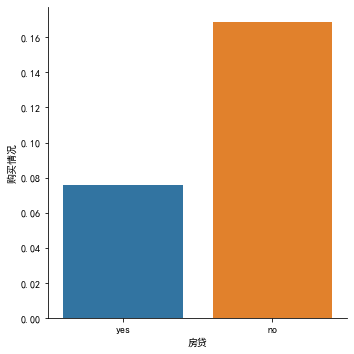

In [817]:
fg=sns.catplot(data=train,x='housing',kind='bar',y='y',ci=None,order=['yes','no'])
fg.set_axis_labels("房贷",'购买情况')


没有房贷的人倾向于定期理财

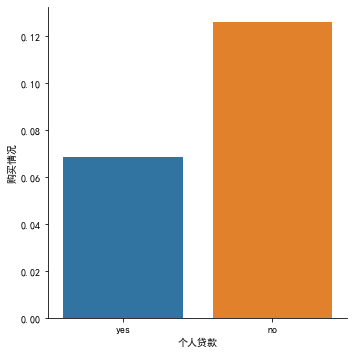

In [818]:
fg=sns.catplot(data=train,x='loan',kind='bar',y='y',ci=None,order=['yes','no'])
fg.set_axis_labels("个人贷款",'购买情况')

没有个人贷款的人倾向于定期理财

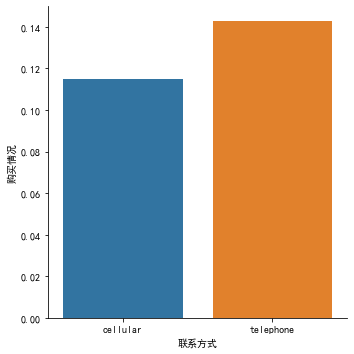

In [819]:
fg=sns.catplot(data=train,x='contact',kind='bar',y='y',ci=None)
fg.set_axis_labels("联系方式",'购买情况')

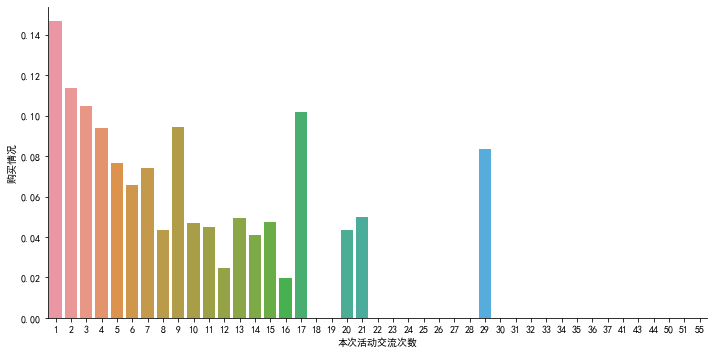

In [820]:
fg=sns.catplot(data=train,x='campaign',kind='bar',y='y',ci=None,aspect=2)
fg.set_axis_labels("本次活动交流次数",'购买情况')


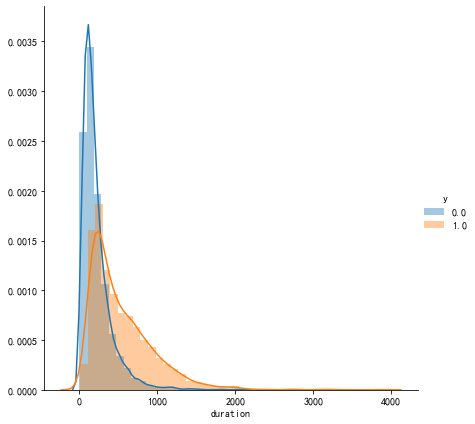

In [821]:
fg = sns.FacetGrid(data=train,height=6,hue='y')
fg = (fg.map(sns.distplot,'duration',bins=40)
      .add_legend())

通过沟通方式等特征分析观察到：

1. 通过移动电话沟通客户定期理财的比率高
2. 沟通次数长并不一定能够提高客户进行定期理财的比率
3. 最后一次沟通的超过一定时长（大约300）后定期理财比率提高


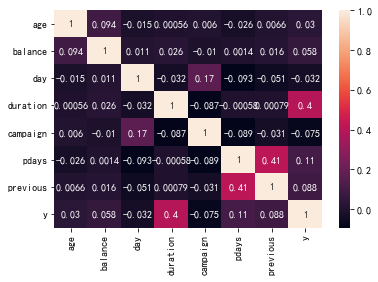

In [822]:
sns.heatmap(data=train.corr(),annot=True)

pearson系数，duration（最后一次联系的交流时长）与预测值成弱相关性，pdays（距离上次活动最后一次联系该客户，过去了多久）和previous（在本次活动之前，与该客户交流过的次数）成相关性。

### 数据集预处理


In [823]:
#字符串标签化
def discrete(col):
    a=pd.DataFrame(col.value_counts()).reset_index()
    b=a['index'].to_dict()
    c=dict(zip(b.values(), b.keys()))
    print(c)
    return c
#月份转换成相应的数值   
def month_to_int(col):
    mon_dict={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
    col=col.map(mon_dict)
    return col

In [824]:
con['job']=con['job'].map(discrete(con['job']))
con['marital']=con['marital'].map(discrete(con['marital']))
con['education']=con['education'].map(discrete(con['education']))
con['default']=con['default'].map(discrete(con['default']))
con['housing']=con['housing'].map(discrete(con['housing']))
con['loan']=con['loan'].map(discrete(con['loan']))
con['contact']=con['contact'].map(discrete(con['contact']))
con['month']=month_to_int(con['month'])

{'blue-collar': 0, 'management': 1, 'technician': 2, 'admin.': 3, 'services': 4, 'retired': 5, 'self-employed': 6, 'entrepreneur': 7, 'unemployed': 8, 'housemaid': 9, 'student': 10}
{'married': 0, 'single': 1, 'divorced': 2}
{'secondary': 0, 'tertiary': 1, 'primary': 2}
{'no': 0, 'yes': 1}
{'yes': 0, 'no': 1}
{'no': 0, 'yes': 1}
{'cellular': 0, 'telephone': 1}


In [825]:
con

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
ID,,,,,,,,,,,,,,,,
1,43,1,0,1,0,291,0,0,0,9,5,150,2,-1,0,0.0
2,42,2,2,2,0,5076,0,0,0,7,4,99,1,251,2,0.0
3,47,3,0,0,0,104,0,1,0,14,7,77,2,-1,0,0.0
4,28,1,1,0,0,-994,0,1,0,18,7,174,2,-1,0,0.0
5,42,2,2,0,0,2974,0,0,0,21,5,187,5,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36165,29,1,1,1,0,54,0,1,0,26,5,257,3,-1,0,NaN
36166,35,1,0,0,0,674,1,0,0,8,8,87,2,-1,0,NaN
36167,38,4,0,0,0,435,0,0,0,23,5,193,2,-1,0,NaN


In [826]:
train=con[con.index<=25317]
test=con[con.index>25317]

In [827]:
from sklearn import tree
import graphviz

In [828]:
from imblearn.over_sampling import SMOTE
y = train['y']
X = train.drop(['y'],axis=1).select_dtypes(exclude=['object'])
oversampler=SMOTE(random_state=0)
os_X,os_y=oversampler.fit_sample(X,y)



from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(os_X.values, os_y.values, test_size=0.3)

In [829]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25154 entries, 1 to 25317
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        25154 non-null  int64  
 1   job        25154 non-null  int64  
 2   marital    25154 non-null  int64  
 3   education  25154 non-null  int64  
 4   default    25154 non-null  int64  
 5   balance    25154 non-null  int64  
 6   housing    25154 non-null  int64  
 7   loan       25154 non-null  int64  
 8   contact    25154 non-null  int64  
 9   day        25154 non-null  int64  
 10  month      25154 non-null  int64  
 11  duration   25154 non-null  int64  
 12  campaign   25154 non-null  int64  
 13  pdays      25154 non-null  int64  
 14  previous   25154 non-null  int64  
 15  y          25154 non-null  float64
dtypes: float64(1), int64(15)
memory usage: 3.3 MB


In [842]:
model_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
params_test={
    'max_depth':range(10,15,1),
    'min_samples_leaf':range(1,7,1),
    'min_samples_split':range(15,25,1)
}
gsearch = GridSearchCV(estimator=model_tree, param_grid=params_test, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
gsearch.fit(train_X, train_y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   32.7s
[Parallel(n_jobs=4)]: Done 1493 out of 1500 | elapsed:   59.5s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:   59.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=4,
             param_grid={'max_depth': range(10, 15),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(15, 25)},
             scoring='accuracy', verbose=1)

In [843]:
gsearch.best_params_

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 15}

In [844]:
gsearch.best_estimator_

DecisionTreeClassifier(max_depth=13, min_samples_split=15, random_state=10)

In [847]:
tr = tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=1, min_samples_split=15,
                       random_state=15)
tr=tr.fit(train_X,train_y)
score = np.mean(cross_val_score(tr,train_X,train_y,cv=5,scoring='accuracy'))
print('决策树分类模型平均性能得分：'+str(score))


决策树分类模型平均性能得分：0.863914283010937


In [848]:
p=tr.predict(test_X)
print(accuracy_score(test_y, p))

0.8687725090036015


In [857]:
test=test.drop('y',axis=1)

KeyError: "['y'] not found in axis"

In [858]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
ID,,,,,,,,,,,,,,,
25318,51,9,0,0,0,174,1,0,1,29,7,308,3,-1,0
25319,32,1,0,1,0,6059,0,0,0,20,11,110,2,-1,0
25320,60,5,0,2,0,0,1,0,1,30,7,130,3,-1,0
25321,32,10,1,1,0,64,1,0,0,30,6,598,4,105,5
25322,41,9,0,0,0,0,0,1,0,15,7,368,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36165,29,1,1,1,0,54,0,1,0,26,5,257,3,-1,0
36166,35,1,0,0,0,674,1,0,0,8,8,87,2,-1,0
36167,38,4,0,0,0,435,0,0,0,23,5,193,2,-1,0


In [859]:
result=tr.predict(test)

In [860]:
test['pre']=result
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,pre
ID,,,,,,,,,,,,,,,,
25318,51,9,0,0,0,174,1,0,1,29,7,308,3,-1,0,0.0
25319,32,1,0,1,0,6059,0,0,0,20,11,110,2,-1,0,0.0
25320,60,5,0,2,0,0,1,0,1,30,7,130,3,-1,0,0.0
25321,32,10,1,1,0,64,1,0,0,30,6,598,4,105,5,0.0
25322,41,9,0,0,0,0,0,1,0,15,7,368,4,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36165,29,1,1,1,0,54,0,1,0,26,5,257,3,-1,0,0.0
36166,35,1,0,0,0,674,1,0,0,8,8,87,2,-1,0,0.0
36167,38,4,0,0,0,435,0,0,0,23,5,193,2,-1,0,0.0
